In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score

In [2]:
data = pd.read_csv('apple_quality.csv')
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
# процент продуктов хорошего и плохого качества
data['Quality'].value_counts()*100/len(data)

good    50.087478
bad     49.887528
Name: Quality, dtype: float64

Хоть данные и сбалансированы, была выбрана метрика качества **F1**. Оценка F1 представляет собой среднее гармоническое значение  precision и recall. Она обеспечивает баланс между  precision и recall. Данная метрика подходит для задач классификации. В данно случае стоблца "Quality", который имеет бинарные значения "good" и "bad".

In [4]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [5]:
data.shape

(4001, 9)

In [6]:
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [7]:
data.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
# удалить строку с пропусками
df = data.copy().dropna()
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [10]:
# исправить тип данных
df["Acidity"] = pd.to_numeric(df["Acidity"])
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [11]:
# удалить стоблец "A_id"
df.drop('A_id', inplace=True, axis=1)

In [12]:
# задать 'good' как 1, а 'bad' как 0. Это понадобиться для дальнейшего
# использования данных на моделях машинного обучения
df['Quality'] = df['Quality'].map({'good':1, 'bad':0})

In [13]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


**target: Quality**

## Scatterplots with targets

In [14]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [15]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

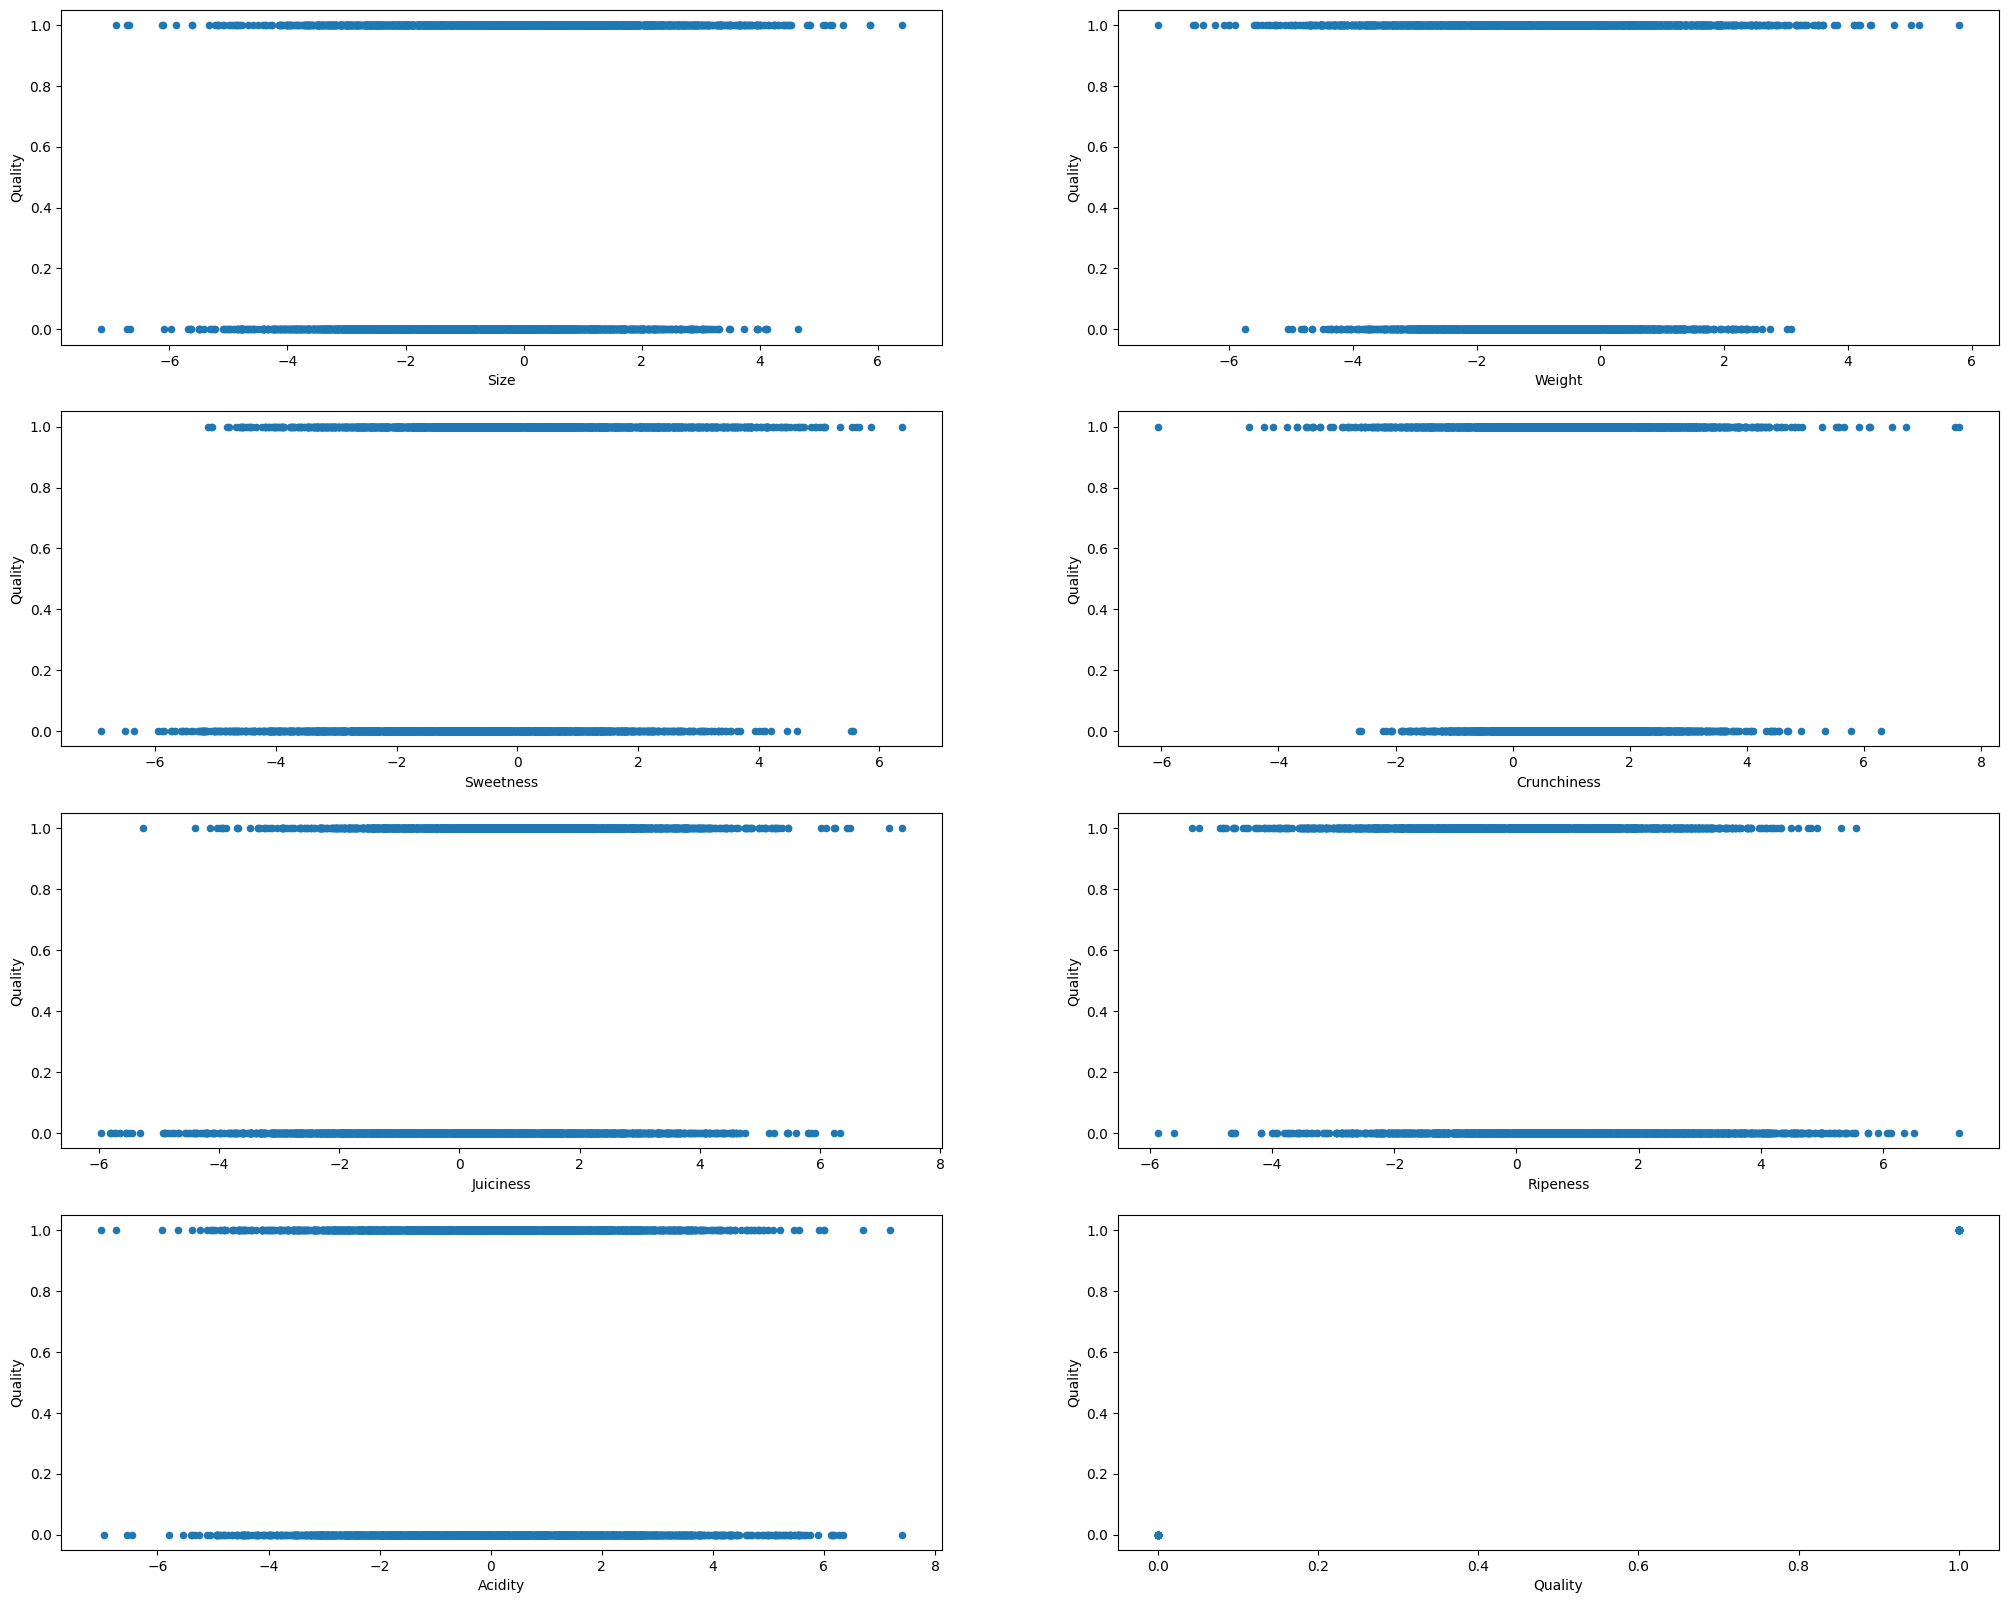

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Quality", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2])

Пока тяжело выделить закономерности относительно target.

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>,
        <Axes: title={'center': 'Quality'}>, <Axes: >]], dtype=object)

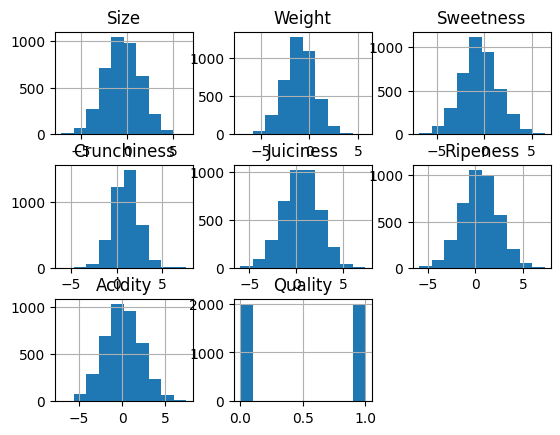

In [17]:
df.hist()

Можно сказать, что остальные признаки распределены нормально. Я значения target распределены одинаково.

## Outliers

In [18]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [19]:
df_class = df['Quality']
df_features = df[df.columns[:-1]]

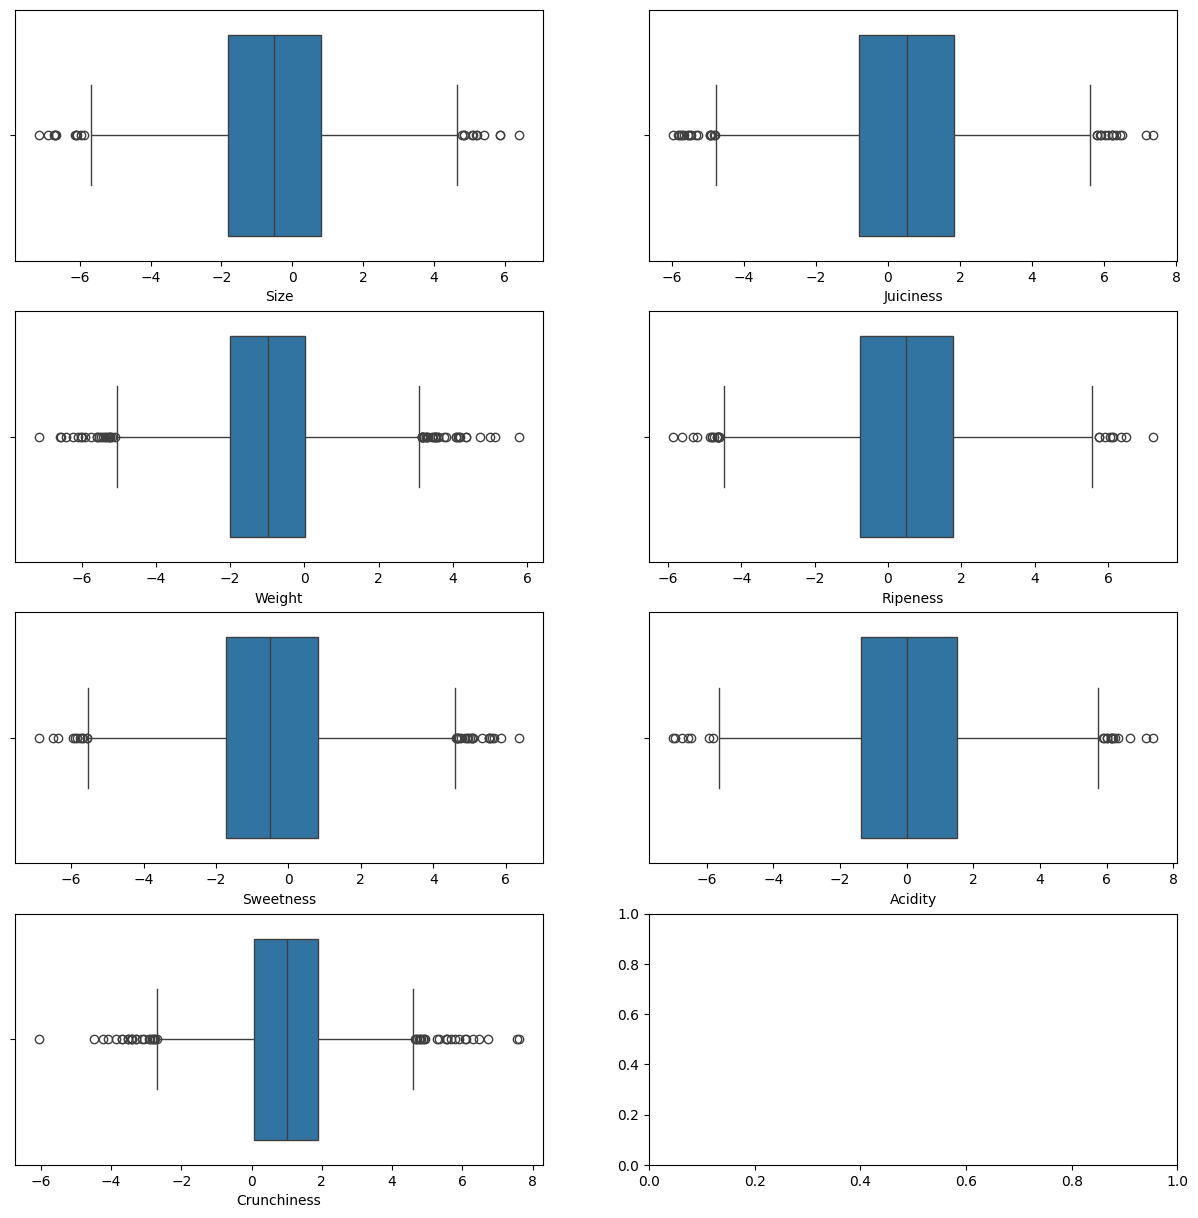

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(df_features.columns):
    sns.boxplot(x=df_features[feature], ax=axes[count % 4, count // 4])
    count += 1

In [21]:
for col in df_features.columns:
    print(f'Outliers for {col} column: {boxplot_stats(df_features[col]).pop(0)["fliers"]}\n')

Outliers for Size column: [-6.12966814 -5.97503209 -6.69012085 -6.90580317 -5.87977074 -6.66972475
 -6.71331515 -6.7101689  -6.08771509 -7.15170306 -6.09955143  5.18962445
  5.8662318   6.4063669   5.40327575  4.83460754  4.79968343  4.84241429
  5.07403149  5.22538346  5.10436377  5.86586054]

Outliers for Weight column: [-6.23510704 -5.10310447 -5.22708663 -6.55668451 -5.90873574 -5.47868222
 -5.59234342 -5.4137325  -6.00074762 -6.58158967 -5.57070479 -5.74638367
 -5.34307646 -5.18741627 -5.54229026 -6.42807547 -5.275557   -5.2398298
 -5.25429044 -6.08689375 -7.14984768 -5.36771094 -6.01055919  5.1490003
  3.60328608  4.73822681  3.2853013   4.36306592  3.82109404  3.59869043
  3.44081133  4.1513682   3.55630685  3.1830111   4.36957149  3.33282145
  4.09388841  3.16426325  3.20789559  3.5117579   3.21976202  3.2652455
  3.30401719  3.51614243  4.17136053  3.52232224  3.77217281  4.09971122
  5.01400211  4.20264313  3.46039566  3.15796135  3.16437031  5.79071359]

Outliers for Sweetne

В данных имеются выбросы, но для первичного построения моделей их лучше не удалять.

## Distributions

<ipython-input-22-8ef95b2736aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'], bins=50, color='r', ax=axes[0, 0])
<ipython-input-22-8ef95b2736aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], bins=50, color='g', ax=axes[0, 1])
<ipython-input-22-8ef95b2736aa>:4: Use

<Axes: xlabel='Acidity', ylabel='Density'>

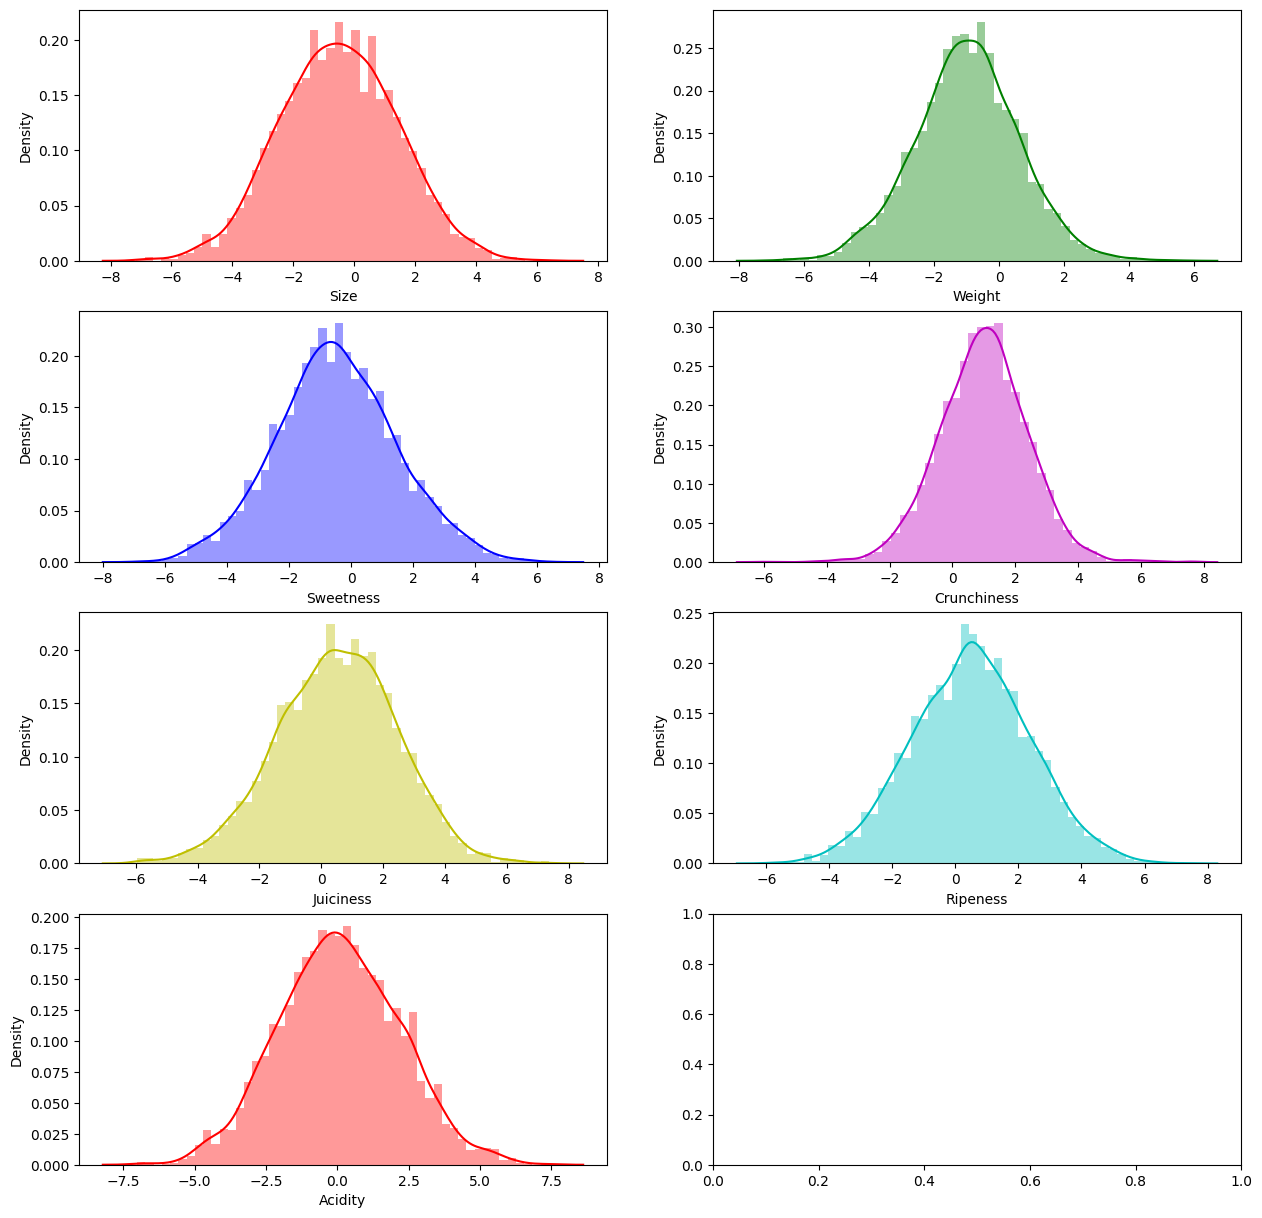

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.distplot(df['Size'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Weight'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Sweetness'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Crunchiness'], bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Juiciness'], bins=50, color='y', ax=axes[2, 0])
sns.distplot(df['Ripeness'], bins=50, color='c', ax=axes[2, 1])
sns.distplot(df['Acidity'], bins=50, color='r', ax=axes[3, 0])


Данные распределены нормально.

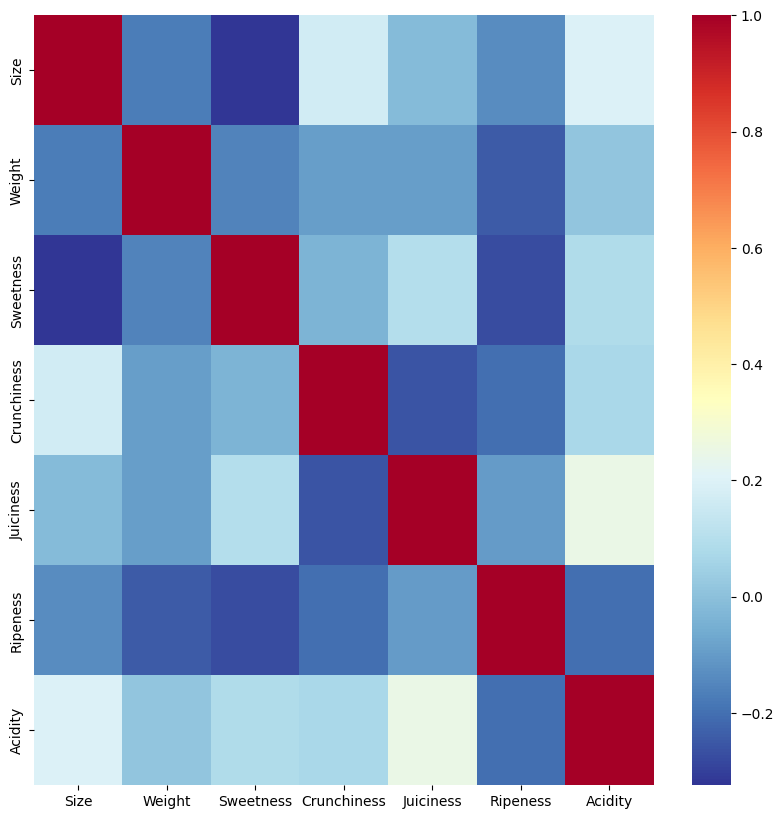

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df_features.corr(), cmap="RdYlBu_r");

Максимальное отклонение корреляции от 0 составляет -0,3. Связь между признаками слабая.

## PCA(n_components=3)


In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled

array([[-1.79842417, -0.95037339,  2.99342063, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-0.35906018, -1.15440431,  2.12769769, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [ 0.1094454 , -0.22575916, -0.65250727, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [-1.1056547 , -0.71690397, -1.01378401, ...,  0.87437918,
         2.27595716, -0.66895013],
       [-1.81811235, -0.49290842,  1.45990059, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 0.40540882, -0.45307081,  0.30449592, ...,  0.39095445,
        -0.68021237,  0.72176064]])

In [25]:
df_scaled.shape

(4000, 7)

In [26]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [27]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

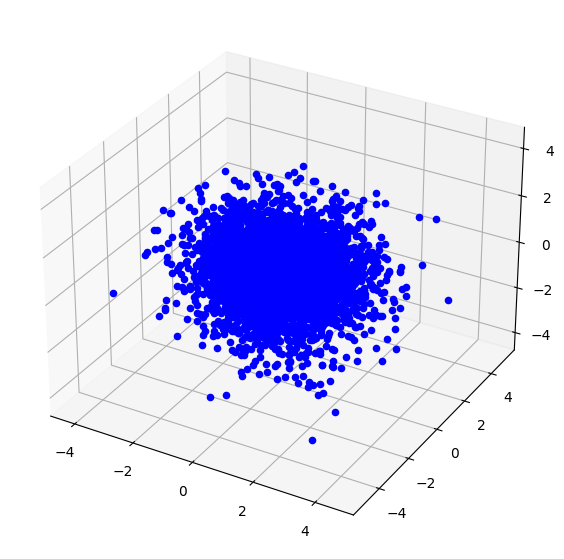

In [28]:
draw_3d(df_pca_3)


## Class visualizations with PCA

In [29]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[0.5644979 , 3.43601677],
       [0.40730266, 1.0238054 ],
       [0.91396535, 0.36102395],
       [2.17736478, 1.2129963 ],
       [1.16831537, 0.3280655 ]])

In [30]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

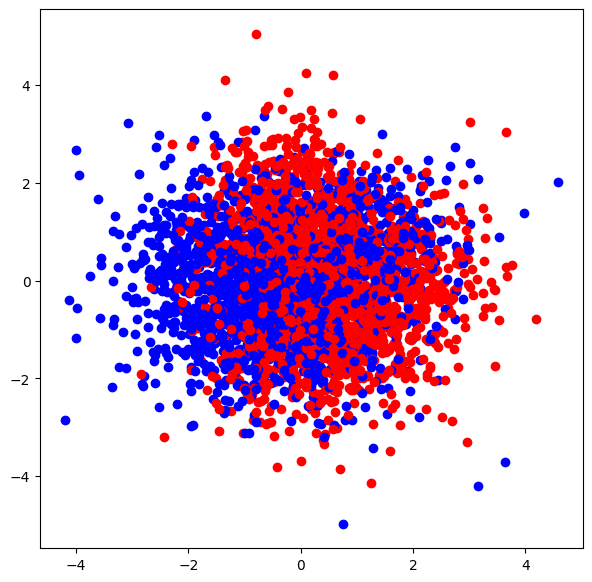

In [31]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])

plt.show()

In [32]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[0.5644979 , 3.43601677, 0.05033291],
       [0.40730266, 1.0238054 , 0.01133414],
       [0.91396535, 0.36102395, 1.39485735],
       [2.17736478, 1.2129963 , 0.562481  ],
       [1.16831537, 0.3280655 , 1.10454811]])

In [33]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

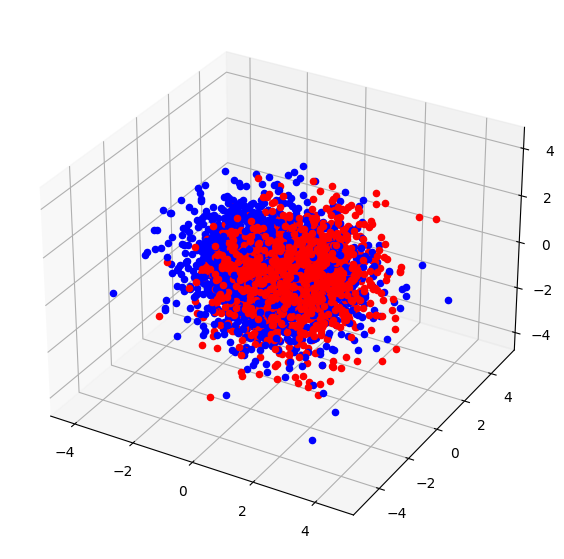

In [34]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()

## Construction and evaluation of the quality of the baseline

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_class, random_state=42, test_size=0.20)

In [42]:
# Константное предсказание
y_pred_const = pd.Series([y_train.mode()[0]] * len(y_test))

In [43]:
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);
y_pred_log_reg = log_reg.predict(X_test)


In [44]:
print(f'F1-score for Constant prediction: {f1_score(y_test, y_pred_const)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Constant prediction: 0.6655546288573811
F1-score for Logistic regression: 0.7528230865746549


Логистическая регрессия дает качество лучше, чем константное предсказание.